In [178]:
# Importing libraries
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import itertools

In [111]:
# Reading Dataset
#df = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name = None)

#Reading all the 7 sheets from "Cardiac_Outcomes.xlsx" files into respective DataFrames

HospitalizationDischarge = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Hospitalization_Discharge")

CardiacComplications = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="CardiacComplications")

Responsivenes = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Responsivenes")

PatientHistory = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="PatientHistory")

Labs = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Labs")

Demography = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Demography")

PatientPrecriptions = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Patient_Precriptions")

# Q.17  Using arrays and loops find the number of patients who were Admitted in the month of November

In [34]:
# Initializing count of patients admitted in November
november_admissions = 0

#Loop through each row
#iterrows interates over rows
# row[''] access the row value in the column

for index,row in HospitalizationDischarge.iterrows():
    admission_date = row['Admission_date']
    patient_count = row['inpatient_number']
    
    # checking for November month
    if admission_date.month == 11:
        november_admissions += 1

print("Number of patients admitted in November:", november_admissions)

Number of patients admitted in November: 195


# Q.18 Create a heatmap on any columns of your choice including at least 1 lab value

Text(0.5, 1.0, 'Heatmap of pulse and oxygen saturation')

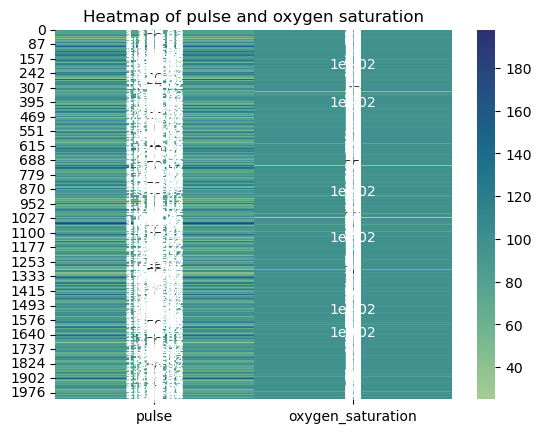

In [314]:
#Labs_df = df['Labs']
#Labs_df.head()

#a = Labs.dropna(subset=['pulse'],inplace = True)
#b = Labs.dropna(subset=['oxygen_saturation'],inplace = True)

sns.heatmap(Labs[['pulse','oxygen_saturation']],annot = True,cmap = "crest")

#plt.hist2d(a , b, bins = 10,cmap = 'viridis')
#plt.colorbar(label = 'Frequency')
plt.title('Heatmap of pulse and oxygen saturation')

# Q. 19 Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

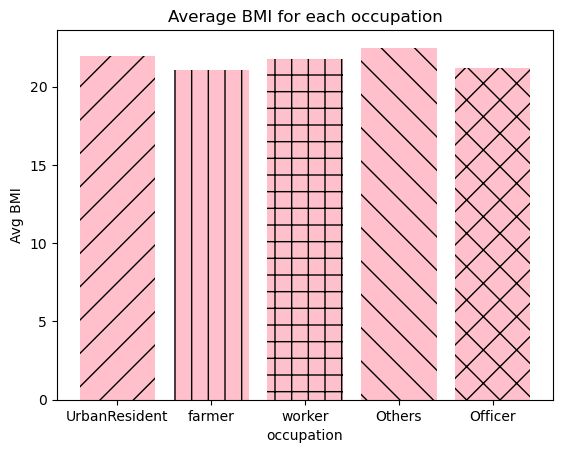

In [108]:
# A for Q 19
# dropping NaN from occupation
Demography.dropna(subset=['occupation'],inplace = True)
unique_occupation = Demography['occupation'].unique() 
occupation_no_duplicates = Demography['occupation'].drop_duplicates() # dropping duplicates
# calculating Avg BMI for each occupation
avg_bmi_by_occupation = Demography.groupby('occupation')['BMI'].mean().round(2)
# converting to list
avg_bmi_list = avg_bmi_by_occupation.values.tolist()
#print(avg_bmi_by_occupation_list,unique_occupation)
# plotting
bars = plt.bar(unique_occupation,avg_bmi_list, color = 'pink')
hatch = ['/','|','+','\\','x'] # hatch patters in the bar
for i, bar in enumerate(bars):  # iterates through bars
    bar.set_hatch(hatch[i % len(hatch)]) # sets hatch patter interating through the index
plt.title('Average BMI for each occupation')
plt.xlabel('occupation')
plt.ylabel('Avg BMI')
plt.show()

### Q. 20 You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n . 
Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. 
x=1, y=1, z=2, n=3

In [222]:
# A for Q. 20
x = 1
y = 1
z=2
n=3

coordinates = [(i,j,k) for i in range(x+1) 
                       for j in range(y+1)
                       for k in range(z+1)
                     if (i+j+k)!= n]
print("possible coordinates:",coordinates)

possible coordinates: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 2)]


### Q.21 Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

In [226]:
# A for Q.21
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
# extracting grades from list and sotring student[0] - name student[1] grade
grades = sorted(set(student[1] for student in python_students))
# finding second lowest grade
second_lowest_grade = grades[1]
# finding names of second_lowest_grade
student_names = [student[0] for student in python_students if student[1] == second_lowest_grade]
print("second lowest grade:",student_names)

second lowest grade: ['Harry', 'Berry']


,inpatient_number,gender,weight,height,BMI,occupation,ageCat,Age,year_of_birth
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,74,1950
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,74,1950
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,63,1961
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,69,1955
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,73,1951


### Q.22 Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [131]:
# A for Q.22
# Merging 3 data sheets
merged_df1 = pd.merge(HospitalizationDischarge,Demography, on ='inpatient_number')
merged_df = pd.merge(merged_df1,PatientPrecriptions, on = 'inpatient_number')
# grouping drugname and patientnumber and counting
prescription_count = merged_df.groupby('inpatient_number')['Drug_name'].count()
# finding max patientid
max_id = prescription_count.idxmax()
# max drug count
count = prescription_count.max()
# dataframe with max patient id
patient_info = merged_df[merged_df['inpatient_number'] == max_id].iloc[0]
# max patient id's age and outcome
max_patient_age = patient_info['Age']
max_patient_outcome = patient_info['outcome_during_hospitalization']
print("Max Patient:",max_id )
print("Prescription Count:",count )
print("Max Patient Age:",max_patient_age )
print("Max Patient outcome:",max_patient_outcome )

Max Patient: 777204
Prescription Count: 16
Max Patient Age: 83
Max Patient outcome: Alive


### Q.23 How many patients were prescribed Digoxin?

In [165]:
#A for Q 23
#filter for drug Digoxin tablet
digoxin_patients = PatientPrecriptions[PatientPrecriptions['Drug_name'] == 'Digoxin tablet'] 
# counting num of patients
num_patients = digoxin_patients['inpatient_number'].count()
print("Number of patients prescribed Digoxin:",num_patients)

Number of patients prescribed Digoxin: 999


### Q.24  What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

Text(0.5, 1.08, 'Severity Score and length of stay are weakly correlated')

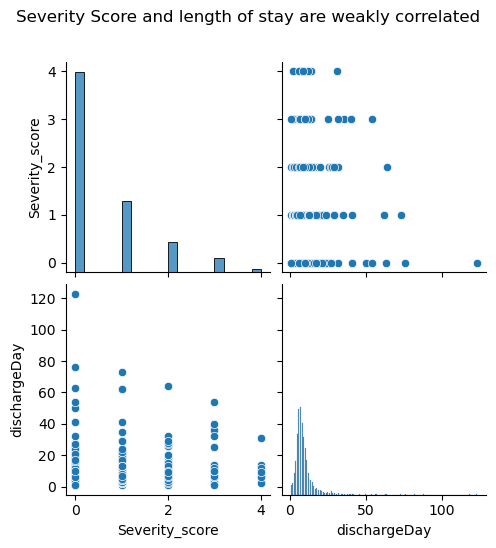

In [284]:
# A for Q.24
#As severity increases we have dischange day drecreasing but also number of patients are also decreasing with serverity,
#.    this doesnot show strong significance and correlation')

# total_hemoglobin, oxyhemoglobin have presence of anemia
# Converting total_hemoglobin values in g/l to g/dl (grams/deciliter)
Labs['total_hemoglobin_grams_deciliter'] = Labs['total_hemoglobin'] / 10
# defining a class with severity score
severity_scores = {
    'Normal' :{'min' : 12.0,'max' : float('inf'), 'score' : 0 },
    'Mild' :{'min' : 10.0,'max' : 11.9 , 'score' : 1 },
    'Moderae' :{'min' : 8.0,'max' : 9.9, 'score' : 2 },
    'Severe' :{'min' : 6.0,'max' : 7.9, 'score' : 3 },
    'Critical' :{'min' : 0.0,'max' : 5.9, 'score' : 4 }
} 

# definition for assigning score
def assign_score(hemoglobin):
    for category, criteria in severity_scores.items():
        if criteria['min'] <= hemoglobin <= criteria['max']:
            return criteria['score']
    return None

# creating column with severity score
Labs['Severity_score'] =  Labs['total_hemoglobin_grams_deciliter'].apply(assign_score)

# merging columns to plot correlation
merged_df = pd.merge(HospitalizationDischarge,Labs, on = ['inpatient_number'])
#merged_df.head()

columns_to_plt = ['Severity_score','dischargeDay']
# paiplot to plot correlation
g = sns.pairplot(merged_df,vars = columns_to_plt)
g.fig.suptitle('Severity Score and length of stay are weakly correlated',y=1.08)

#plt.title('Severity Score and length of stay are weakly correlated')

#corr_matrix = merged_df[columns_to_plt].corr()
#plt.matshow(corr_matrix,cmap = 'coolwarm',fignum = 1)
#plt.xticks(range(len(columns_to_plt)),columns_to_plt,rotation = 45)
#plt.yticks(range(len(columns_to_plt)),columns_to_plt)


#plt.scatter(merged_df['Severity_score'],merged_df['dischargeDay'])



In [247]:
#HospitalizationDischarge.head()

### Q. 25 Using GCS score, how many patients are considered to be in a coma?

In [149]:
# A for Q 25
#Responsivenes['consciousness'].unique()
coma_paitents = Responsivenes[Responsivenes['consciousness']== 'Nonresponsive']
num_coma_patients = len(coma_paitents)
GSC_coma_paients = coma_paitents['GCS']
print("number of coma patients:", num_coma_patients)
print("GSC of coma patients:", GSC_coma_paients)


number of coma patients: 11
GSC of coma patients: 1028    3
1058    3
1111    3
1184    4
1207    3
1252    3
1295    3
1872    3
1893    3
1997    3
2006    3
Name: GCS, dtype: int64


### Q. 26 Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [175]:
# A for Q.26
# definition for generating random age from age range

def generate_age(ageCat):
    start, end = map(int, ageCat.split('-')) # splits 2 values in age range and assinging o start and end. 
    return np.random.randint(start, end + 1)

Demography['Age'] = Demography['ageCat'].apply(generate_age) # applying each age range to generate_age
average_age = round(Demography['Age'].mean(),2) # calculating avg and rounding to 2 decimals
print("Average Age:", average_age)

Average Age: 74.31


### Q. 27 Using the age column generated in Q.26, calculate year of birth for each patient

In [177]:
# A for Q.27
# calculating current year

current_year = datetime.datetime.now().year
Demography['year_of_birth'] = current_year - Demography['Age'] # calc difference between age and current year.
Demography.head()

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,Age,year_of_birth
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,74,1950
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,79,1945
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,60,1964
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,78,1946
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,77,1947


### Q. 28 Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

In [182]:
# A for Q.28
#creating dictionary
dict_df = Demography.set_index('inpatient_number')['gender'].to_dict()
# only first 10 values
dict_10Values = dict(itertools.islice(dict_df.items(),10))
#dict_10 = take(10,dict_df.items())
print("First 10 values of dictionary:",dict_10Values)

First 10 values of dictionary: {857781: 'Male', 743087: 'Female', 866418: 'Male', 775928: 'Male', 810128: 'Female', 823318: 'Female', 844094: 'Male', 787530: 'Female', 795420: 'Female', 829801: 'Female'}


### Q. 29 What percentage of those in a coma also have diabetes?

In [164]:
# A for Q. 29
merged_df2 = pd.merge(Responsivenes,PatientHistory, on = 'inpatient_number')
coma_paitents = len(merged_df2[merged_df2['consciousness']== 'Nonresponsive'])
diabetes_patients = len(merged_df2[(merged_df2['consciousness']== 'Nonresponsive') & (merged_df2['diabetes']== 1)])
percentage_coma_diabeties = round((diabetes_patients/coma_paitents)*100,2)
print("Percentage of coma patients with diabeties:", percentage_coma_diabeties,"%")

percentage of coma patients with diabeties: 18.18 %


In [180]:
Labs.head()

,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
0,857781,36.7,87,19,102,64,76.666667,33,108.3,12.55,...,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0
1,743087,36.8,95,18,150,70,96.666667,33,62.0,4.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,866418,36.5,98,18,102,67,78.666667,33,185.1,15.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,775928,36.0,73,19,110,74,86.000000,33,104.8,8.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,35.0,88,19,134,62,86.000000,33,83.9,6.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
CardiacComplications.head()

,inpatient_number,NYHA_cardiac_function_classification,Killip_grade,myocardial_infarction,congestive_heart_failure,peripheral_vascular_disease,type_of_heart_failure,LVEF,left_ventricular_end_diastolic_diameter_LV,mitral_valve_EMS,mitral_valve_AMS,EA,tricuspid_valve_return_velocity,tricuspid_valve_return_pressure
0,857781,3,3,0,0,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,743087,3,1,0,0,0,Both,NaN,40.0,1.16,1.52,NaN,3.34,47.0
2,866418,2,2,0,0,0,Both,NaN,46.0,0.84,0.12,7.00,2.80,32.0
3,775928,3,2,0,0,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,3,2,0,0,0,Both,NaN,64.0,1.20,0.90,1.33,NaN,NaN


### Q. 30 Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

In [304]:
# A for Q. 30
# Echocardiography An echocardiogram is an ultrasound test that checks the structure and function of your heart. 
# An echo can diagnose a range of conditions including cardiomyopathy and valve disease.
# These are the columns related to Echocardiography (LVEF, mitral_valve_EMS,mitral_valve_AMS,tricuspid_valve_return_velocity,tricuspid_valve_return_pressur,EA,
# left_ventricular_end_diastolic_diameter)
#NYHA_cardiac_function_classification : New York Heart Association (NYHA) classification,  categorizes cardiac function into four classes

# ceating class for scores
severity_scores = {      
     'class1' :{'val' : 2, 'score' : 2 },
    'class2' :{'val' : 3, 'score' : 3 },
    'class3' :{'val' : 4, 'score' : 4 }
}


# function to assign severity scores

def assign_score(cardiac_function):
    for category, criteria in severity_scores.items():
        if criteria['val'] == cardiac_function :
            return criteria['score']
    return None

# creating column for score
CardiacComplications['Severity_score'] =  CardiacComplications['NYHA_cardiac_function_classification'].apply(assign_score)

#CardiacComplications['Severity_score']
# merging columns to calc average severity score for each outcome
merged_df = pd.merge(HospitalizationDischarge,CardiacComplications,on = 'inpatient_number')
avg_serverity_score = round(merged_df.groupby('outcome_during_hospitalization')['Severity_score'].mean(),2)
print(avg_serverity_score)




outcome_during_hospitalization
Alive                    3.10
Dead                     3.45
DischargeAgainstOrder    3.59
Name: Severity_score, dtype: float64


### Q.31 Group the days to re-admission into bins and count how many patients were in each bin

In [208]:
# A for Q. 31
HospitalizationDischarge.head()
# defining bins

bins = [90,180,270,360,450,float('inf')] 
# creaing patients with cut() method
HospitalizationDischarge['readmission_bins'] = pd.cut(HospitalizationDischarge['readmission_time_days_from_admission'],bins=bins,labels=['3-months','6-months','9-months','1-year','1-year+'])
# counting patients in each bin
count = HospitalizationDischarge['readmission_bins'].value_counts()
print("Number of patients for each bin:\n",count)

Number of patients for each bin:
 3-months    204
6-months    103
9-months     45
1-year+      29
1-year       22
Name: readmission_bins, dtype: int64


### Q.32 Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

Cardiology-NonEmergency     859
Cardiology-Emergency        688
GeneralWard-Emergency       195
Others-NonEmergency         121
GeneralWard-NonEmergency     70
Others-Emergency             60
ICU-Emergency                13
ICU-NonEmergency              2
Name: combined_admisiion, dtype: int64


Text(0.5, 1.0, 'Number of patients for each admission')

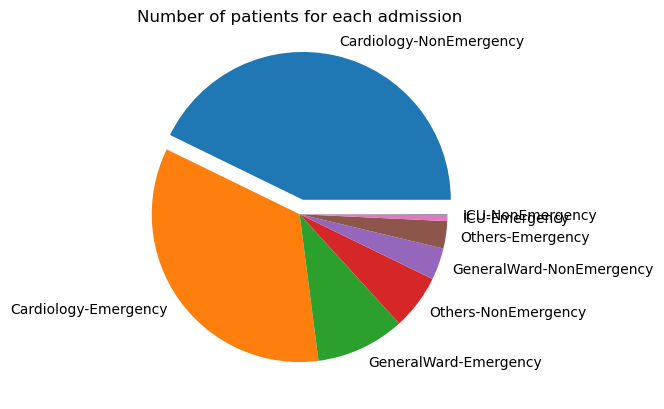

In [218]:
# A for Q.32
# concatinating 2 admission columns
HospitalizationDischarge['combined_admisiion'] =  HospitalizationDischarge['admission_ward']+ '-' + HospitalizationDischarge['admission_way']
patient_count = HospitalizationDischarge['combined_admisiion'].value_counts()
print(patient_count)

# creating pie chart and explode 
explode= [0.1 if i == patient_count.idxmax()
              else 0 
              for i in patient_count.index]
plt.pie(patient_count,labels = patient_count.index, explode = explode)
plt.title('Number of patients for each admission')
#HospitalizationDischarge.head()